# Case Study: Pancreatic Endocrinogenesis

## Import Packages

In [1]:
%load_ext autoreload
%autoreload 2

import os
import glob
import random
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt
# import from absolute directory
#srcdir = '/Users/pengzhizhang/cellDancer/src'
#srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
srcdir = '/Users/chen.weiqing/Documents/GitHub/cellDancer/src'
sys.path.append(srcdir)

import celldancer.cdplt as cdplt
# import celldancer.velocity_estimation as calc_velocity
from celldancer.cdplt import colormap
from celldancer import velocity_estimation
from celldancer.compute_cell_velocity import compute_cell_velocity
from celldancer.pseudo_time import pseudo_time

## Velocity Estimation

In [18]:
%autoreload 2

#raw_path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/PancreaticEndocrinogenesis.csv'
raw_path='/Users/chen.weiqing/code/celldancer/PancreaticEndocrinogenesis.csv'
load_raw_data=pd.read_csv(raw_path)
load_raw_data

gene_list=["Sulf2"]

result_path = '/Users/chen.weiqing/code/celldancer/pancreas/velocity_result'
brief, load_cellDancer=velocity_estimation.train(load_raw_data,gene_choice=gene_list,result_path=result_path,n_jobs=8)

Using /Users/chen.weiqing/code/celldancer/pancreas/velocity_result/cell_dancer_velocity_2022-05-13 07-37-09 as the output path.


Velocity Estimation: 100%|████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.82s/it]


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
---------------------------------------------

## Set Parameters

In [19]:
max_epoches=200
check_n_epoch=10
learning_rate=0.001
downsample_method='neighbors'
step_i=200
step_j=200
sampling_ratio=0.125
n_neighbors=30
optimizer='Adam'
n_neighbors_downsample=30
auto_downsample=True
auto_norm_u_s=True
cost_type='smooth'
smooth_weight=0.1
patience=3
binning=True

# Velocity Estimation
brief, load_cellDancer=velocity_estimation.train(load_raw_data,\
                                                 gene_choice=gene_list,\
                                                 max_epoches=max_epoches,\
                                                 check_n_epoch=check_n_epoch,\
                                                 learning_rate=learning_rate, \
                                                 downsample_method=downsample_method,\
                                                 step_i=step_i,\
                                                 step_j=step_j,\
                                                 sampling_ratio=sampling_ratio,\
                                                 n_neighbors=n_neighbors,\
                                                 optimizer=optimizer,\
                                                 n_neighbors_downsample=n_neighbors_downsample,\
                                                 auto_downsample=auto_downsample,\
                                                 auto_norm_u_s=auto_norm_u_s,\
                                                 cost_type=cost_type,\
                                                 smooth_weight=smooth_weight,\
                                                 patience=patience,\
                                                 binning=binning,\
                                                 result_path=result_path,n_jobs=1)

Using /Users/chen.weiqing/code/celldancer/pancreas/velocity_result/cell_dancer_velocity_2022-05-13 07-42-22 as the output path.
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


Velocity Estimation: 100%|████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.63s/it]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


## Sample Genes' Velocity Plot

In [26]:
ncols=5


gene_list=["Sulf2"]
height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=cdplt.colormap.colormap_pancreas,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

ValueError: Invalid RGBA argument: 'Ductal'

<Figure size 1440x288 with 1 Axes>

## Load velocity estimation result of 2000 genes

In [5]:
#detail_result_path = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/pancreas/velocity_result/velocity_result_all_genes_with_bin/2000_smooth/combined_detail/combined_detail.csv'
detail_file = '/Users/chen.weiqing/code/celldancer/pancreas/combined_detail.csv'

output_path = os.getcwd()
load_cellDancer=pd.read_csv(detail_file)
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2
0,0,2010107G23Rik,0.645871,0.000000,0.631752,0.000444,0.004090,0.033074,0.143236,0.085577,Pre-endocrine,AAACCTGAGAGGGATA,6.143066,-0.063644
1,1,2010107G23Rik,0.659958,0.050844,0.667935,0.049499,0.002315,0.013641,0.159593,0.085577,Ductal,AAACCTGAGCCTTGAT,-9.906417,0.197778
2,2,2010107G23Rik,0.536477,0.031027,0.543241,0.030047,0.002852,0.018068,0.154822,0.085577,Alpha,AAACCTGAGGCAATTA,7.559791,0.583762
3,3,2010107G23Rik,0.172749,0.000000,0.168829,0.000422,0.003884,0.025258,0.148675,0.085577,Ductal,AAACCTGCATCATCCC,-11.283765,4.218998
4,4,2010107G23Rik,2.669759,0.024144,2.671663,0.020978,0.003705,0.064247,0.127344,0.085577,Ngn3 high EP,AAACCTGGTAAGTGGC,1.721565,-4.753407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7391995,3691,Zfp949,0.175796,0.175190,0.163429,0.174457,0.209083,0.203498,0.271190,0.043265,Pre-endocrine,TTTGTCAAGTGACATA,4.768472,-1.388353
7391996,3692,Zfp949,0.078194,0.130215,0.086273,0.142232,0.216891,0.203658,0.268408,0.043265,Ngn3 high EP,TTTGTCAAGTGTGGCA,-1.873335,-4.182650
7391997,3693,Zfp949,0.000000,0.044002,0.011225,0.076212,0.210932,0.204190,0.266029,0.043265,Ductal,TTTGTCAGTTGTTTGG,-9.882250,-0.105594
7391998,3694,Zfp949,0.041343,0.086365,0.050158,0.108793,0.214619,0.203931,0.267263,0.043265,Alpha,TTTGTCATCGAATGCT,6.612424,4.531895


In [6]:
def filter_by_u0(cutoff,load_cellDancer):
    df_tmp=pd.DataFrame(load_cellDancer.groupby(['gene_name'], sort=False)['u0'].max())
    gene_select=list(df_tmp[df_tmp.u0>cutoff].index)
    print('left '+str(len(gene_select)))
    load_cellDancer_filtered=load_cellDancer[load_cellDancer.gene_name.isin(gene_select)].reset_index(drop=True)
    return (load_cellDancer_filtered)
load_cellDancer_filtered_u0_1=filter_by_u0(1,load_cellDancer)

left 412


(0.0, 10.0)

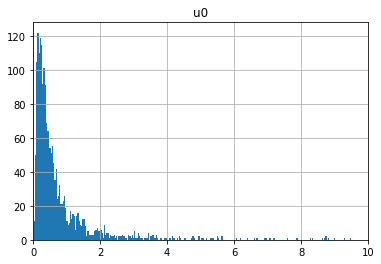

In [7]:
load_cellDancer.groupby('gene_name').max().hist('u0',bins=10000)
plt.xlim(0,10)

(0.0, 10.0)

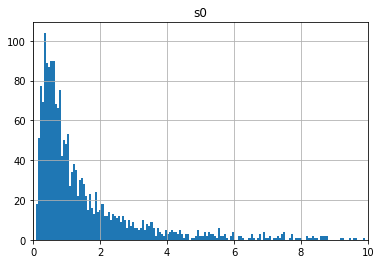

In [8]:
load_cellDancer.groupby('gene_name').max().hist('s0',bins=10000)
plt.xlim(0,10)

## Compute Cell Velocity and Estimate Pseudotime

In [9]:
%load_ext autoreload
%autoreload 2

# set parameters
n_neighbors=5 #100
downsample_step=(60,60)
grid=(20,20)
dt = 0.01
t_total = 10000
n_repeats = 10

# compute_cell_velocity
gene_choice=list(set(load_cellDancer.gene_name))
compute_cell_velocity(load_cellDancer=load_cellDancer,
              gene_list=gene_choice,
              mode="embedding",
              transfer_mode=transfer_mode,#'power10',
              n_neighbors=n_neighbors,
              step=downsample_step)

# plot_cell_velocity
fig, ax = plt.subplots(figsize=(20,20))
clusters = load_cellDancer['clusters'].drop_duplicates().to_list()
cdplt.cell.scatter_cell(ax,load_cellDancer, colors=cdplt.colormap.colormap_pancreas, alpha=0.5, s=30,velocity=True)
ax.axis('off')
plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


NameError: name 'transfer_mode' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
ax.quiver(load_cellDancer.embedding1,load_cellDancer.embedding2,load_cellDancer.velocity1,load_cellDancer.velocity2)

In [ ]:
load_cellDancer

## Estimate pseudotime

In [ ]:
%%capture
#import importlib
#importlib.reload(sys.modules['pseudo_time'])

cell_time = dict()
dt = 0.01
t_total = {dt:int(10/dt)} 
n_repeats = 10
grid = (20,20)
pseudo_time(load_cellDancer, grid, dt, t_total[dt], downsample_step=downsample_step, n_repeats=n_repeats)

In [ ]:
load_cellDancer

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(15,4))
gene = 'Sulf2'
cdplt.cell.scatter_cell(ax[0],load_cellDancer, colors='alpha', 
             gene_name=gene, velocity=False, alpha=1)
cdplt.cell.scatter_cell(ax[1],load_cellDancer, colors='beta', 
             gene_name=gene, velocity=False, alpha=1)
cdplt.cell.scatter_cell(ax[2],load_cellDancer, colors='gamma', 
             gene_name=gene, velocity=False, alpha=1)
cdplt.cell.scatter_cell(ax[3],load_cellDancer, colors='spliced', 
             gene_name=gene, velocity=False, alpha=1)
cdplt.cell.scatter_cell(ax[4],load_cellDancer, colors='unspliced', 
             gene_name=gene, velocity=False, alpha=1)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
ax[4].axis('off')
ax[0].set_title('alpha-'+gene)
ax[1].set_title('beta-'+gene)
ax[2].set_title('gamma-'+gene)
ax[3].set_title('spliced-'+gene)
ax[4].set_title('unspliced-'+gene)
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
clusters = load_cellDancer['clusters'].drop_duplicates().to_list()
cdplt.cell.scatter_cell(ax,load_cellDancer, colors='pseudotime', alpha=0.5, 
             gene_name=gene, velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
ax.axis('off')
plt.show()

In [ ]:
ncols=5
fig = plt.figure(figsize=(20,12))
gene_list=["Sulf2"]
load_cellDancer
for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='s0',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=cdplt.colormap.colormap_pancreas,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene_name=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

In [ ]:
ncols=5
fig = plt.figure(figsize=(20,12))
import math
load_cellDancer
for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='s0',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=cdplt.colormap.colormap_pancreas,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene_name=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

In [ ]:
%load_ext autoreload
%autoreload 2
import math
ncols=5
fig = plt.figure(figsize=(20,24))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=cdplt.colormap.colormap_pancreas,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

## UMAP using alpha, beta, and gamma

In [ ]:
cdplt.cell.plot_para_umap

In [ ]:
load_cellDancer=cdplt.cell.calculate_para_umap(load_cellDancer,'alpha')

In [ ]:
load_cellDancer=cdplt.cell.calculate_para_umap(load_cellDancer,'beta')

In [ ]:
load_cellDancer=cdplt.cell.calculate_para_umap(load_cellDancer,'gamma')

In [ ]:
load_cellDancer=cdplt.cell.calculate_para_umap(load_cellDancer,'alpha_beta_gamma')

In [ ]:
cdplt.cell.plot_para_umap('alpha',load_cellDancer,cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_para_umap('alpha',load_cellDancer,gene_name='Top2a',cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)

In [ ]:
cdplt.cell.plot_para_umap('beta',load_cellDancer,cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_para_umap('beta',load_cellDancer,gene_name='Top2a',cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)

In [ ]:
cdplt.cell.plot_para_umap('gamma',load_cellDancer,cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_para_umap('gamma',load_cellDancer,gene_name='Top2a',cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)

In [ ]:
cdplt.cell.plot_para_umap('alpha_beta_gamma',load_cellDancer,cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
cdplt.cell.plot_para_umap('alpha_beta_gamma',load_cellDancer,gene_name='Top2a',cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)

In [ ]:
def calculate_para_umap(load_cellDancer,para,umap_n=25):
    
    import umap
    if set([(para+'_umap1'),(para+'_umap2')]).issubset(load_cellDancer.columns):
        load_cellDancer=load_cellDancer.drop(columns=[(para+'_umap1'),(para+'_umap2')])
        
    if para=='alpha' or para=='beta' or para=='gamma':
        para_df=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values=para)
    elif para=='alpha_beta_gamma':
        alpha_df=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='alpha')
        beta_df=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='beta')
        gamma_df=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='gamma')
        para_df=pd.concat([alpha_df,beta_df,gamma_df],axis=1)
    else:
        print('para should be set in one of alpha, beta, gamma, or alpha_beta_gamma.')

    def get_umap(df,n_neighbors=umap_n, min_dist=0.1, n_components=2, metric='euclidean'): 
        fit = umap.UMAP(
            n_neighbors=n_neighbors,
            min_dist=min_dist,
            n_components=n_components,
            metric=metric
        )
        embed = fit.fit_transform(df);
        return(embed)
    umap_para=get_umap(para_df)
    umap_info=pd.DataFrame(umap_para,columns=[(para+'_umap1'),(para+'_umap2')])

    gene_amt=len(load_cellDancer.gene_name.drop_duplicates())
    umap_col=pd.concat([umap_info]*gene_amt)
    umap_col.index=load_cellDancer.index
    load_cellDancer=pd.concat([load_cellDancer,umap_col],axis=1)
    return(load_cellDancer)

def plot_para_umap(para,load_cellDancer,gene_name=None,umap_n=25,cluster_map=None,save_path=None,title=None,legend_annotation=False):
    import numpy as np
    onegene=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]]
    umap_para=onegene[[(para+'_umap1'),(para+'_umap2')]].to_numpy()
    onegene_cluster_info=onegene.clusters
    
    if gene_name is None:
        if cluster_map is None:
            from plotting.colormap import build_colormap
            cluster_map=build_colormap(onegene_cluster_info)

        colors = list(map(lambda x: cluster_map.get(x, 'black'), onegene_cluster_info))

        if legend_annotation:
            markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in cluster_map.values()]
            lgd=plt.legend(markers, cluster_map.keys(), numpoints=1,loc='upper left',bbox_to_anchor=(1.01, 1))

        plt.scatter(umap_para[:,0], umap_para[:,1],c=colors,s=15,alpha=0.5,edgecolor="none")
        plt.axis('square')
        plt.axis('off')
    
    else:
        onegene=load_cellDancer[load_cellDancer.gene_name==gene_name]
        plt.figure()
        plt.scatter(umap_para[:,0], umap_para[:,1],c=np.log(onegene.s0+0.0001),s=15,alpha=1,edgecolor="none")
        plt.axis('square')
        plt.axis('off')
        plt.colorbar(label=gene_name+" s0")
        
    if save_path is not None:
        plt.savefig(save_path,bbox_inches='tight',bbox_extra_artists=(lgd,))
    umap_df=pd.concat([pd.DataFrame({'umap1':umap_para[:,0],'umap2':umap_para[:,1]})],axis=1)

## Rsquare rank

In [ ]:
from celldancer.utilities import rank_rsquare

In [ ]:
%load_ext autoreload
%autoreload 2

cluster_choice=['Blood progenitors 1','Blood progenitors 2','Erythroid1','Erythroid2','Erythroid3']
rsquare_rank=rank_rsquare(load_cellDancer,gene_list=gene_list,cluster_choice=cluster_choice)
rsquare_rank